In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in STOR 120

def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

### Function Defined in Class

In [3]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [4]:
def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

In [5]:
def slope(t, x, y):
    """t is a table; x and y are column labels"""
    r = correlation(t, x, y)
    slope_xy = r * np.std(t.column(y)) / np.std(t.column(x))
    return slope_xy

In [6]:
def intercept(t, x, y):
    """t is a table; x and y are column labels"""
    slope_xy = slope(t, x, y)
    intercept_xy = np.average(t.column(y) - slope_xy * np.average(t.column(x)))
    return intercept_xy

In [7]:
def fitted_values(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

### Another Example

We will use the Boston housing data set. The Boston dataset records medv (median house value) for 506 neighborhoods around Boston. We will build a regression model to predict `medv` using 1 predictor: lstat (percent of households with low socioeconomic status). 

In [8]:
boston = Table.read_table('boston_house_prices.csv')
boston

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


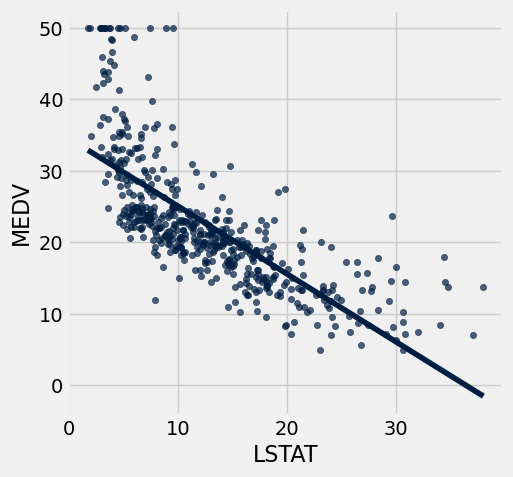

In [9]:
# Data Visualization
# Is there a relationship between MEDV and LSTAT?

boston.scatter('LSTAT', 'MEDV', fit_line = True)

In [10]:
# Suppose the association/relationship is linear, what is the strength 
# of the relationship?

correlation(boston, 'LSTAT', 'MEDV')

-0.73766272617401474

In [11]:
# Find the line of best fit/prediction line/regression line/regression equation.
# APPROACH 1

reg_slope = slope(boston, 'LSTAT', 'MEDV')
reg_intercept = intercept(boston, 'LSTAT', 'MEDV')

reg_slope, reg_intercept

(-0.9500493537579906, 34.553840879383095)

In [12]:
# Find the line of best fit/prediction line/regression line/regression equation.
# APPROACH 2

# Define the boston RMSE function with the x(LSTAT) and y(MEDV) variables.

def boston_rmse(any_slope, any_intercept):
    x = boston.column('LSTAT')
    y = boston.column('MEDV')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

# Pass the name of the function to the minimize function without any arguments.
minimize(boston_rmse)

array([ -0.95004916,  34.5538284 ])

In [13]:
print("The estimated regession line is: ","predicted/average value of MEDV =", 
      reg_slope, "*LSTAT + ", reg_intercept)

The estimated regession line is:  predicted/average value of MEDV = -0.950049353758 *LSTAT +  34.5538408794


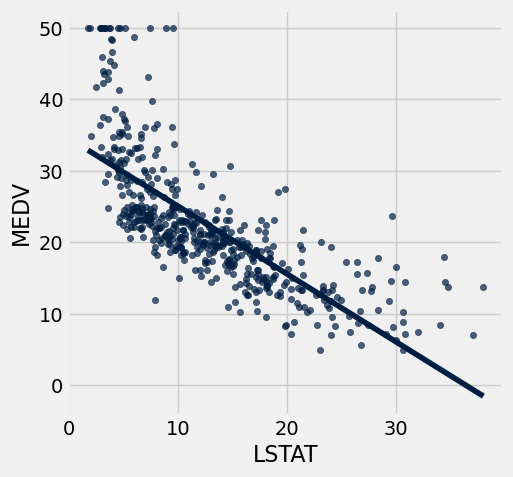

In [14]:
# Can you show a visualization of this line?

boston.scatter('LSTAT', 'MEDV', fit_line = True)

In [15]:
# When LSTAT = 25, what is the predicted median value of houses in that neighborhood?

pred_25 = reg_slope * 25 + reg_intercept
pred_25

10.802607035433329

In [16]:
# Can you make a prediction for all values of LSTAT in the original data set?

def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

boston_with_predicted = boston.select('LSTAT','MEDV').with_column(
    'Predicted medv', fitted_values(boston, 'LSTAT','MEDV')

)

boston_with_predicted

LSTAT,MEDV,Predicted medv
4.98,24,29.8226
9.14,21.6,25.8704
4.03,34.7,30.7251
2.94,33.4,31.7607
5.33,36.2,29.4901
5.21,28.7,29.6041
12.43,22.9,22.7447
19.15,27.1,16.3604
29.93,16.5,6.11886
17.1,18.9,18.308


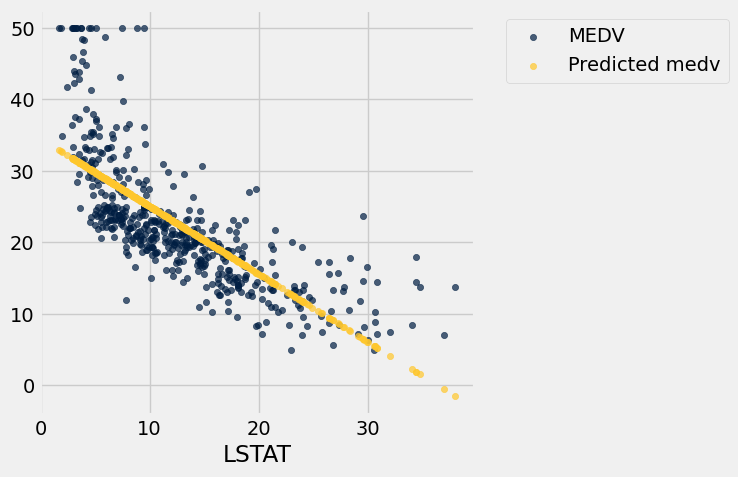

In [17]:
# Produce a scatterplot of the observed and predicted values of MEDV against LSTAT.
# Can you REALLY say that a linear model is a reasonable fit? 

boston_with_predicted.scatter('LSTAT')

In [18]:
# Find the coefficient of determination and interpret it.

(correlation(boston, 'LSTAT', 'MEDV'))**2

0.54414629758647948

54% of the variations in median house values(MEDV) can be explained by variations in 
percent of households with low socioeconomic status(LSTAT)

In [19]:
# What is the value of the RMSE when the estimates of the regression coefficients are given?

boston_rmse(reg_slope, reg_intercept)

6.2034641314264203

### Residual Diagnostics: Residual Plots - Another Example

- Residual plots help us make visual assessments of the quality of a linear regression analysis. 

- Such assessments are called diagnostics. The function `residual_plot` below draws the residual plot to visually assess the quality of the regression analysis.

- A residual plot can be drawn by plotting the residuals against the predictor variable. 

- **The residual plot of a good regression shows no pattern.**

- **The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.**

In [20]:
def residual(table, x, y):
    return table.column(y) - fitted_values(table, x, y)

In [21]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

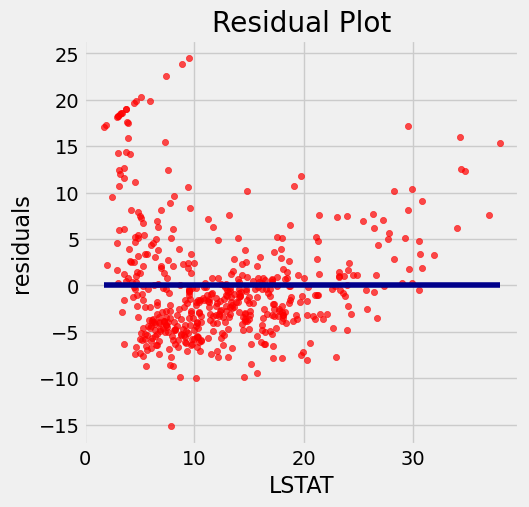

In [22]:
# Produce the residual plot of the regression analysis of MEDV against LSTAT.

residual_plot(boston, 'LSTAT', 'MEDV')

What do you think about the residual plot above? 

Does it indicate that the linear regression model is a good fit for the data set? Does it meet the condition that *the residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable?*

What does this mean?

### Nonlinear Models

**Quadratic Function**

Recall from previous algebra classes that the general algebraic form of a quadratic model given as:

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$, and $a \neq 0$


Suppose we wanted to fit a quadratic model to the data set.

In [23]:
def boston_quadratic_rmse(a, b, c):
    x = boston.column('LSTAT')
    y = boston.column('MEDV')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [24]:
best_quad = minimize(boston_quadratic_rmse)
best_quad

array([  0.04354692,  -2.33282231,  42.86199275])

In [25]:
print("The estimated quadratic model is: predicted MEDV =",best_quad.item(0),"*(LSTAT **2) + ", best_quad.item(1),"*(LSTAT) + ",best_quad.item(2))

The estimated quadratic model is: predicted MEDV = 0.04354692396620809 *(LSTAT **2) +  -2.3328223063626026 *(LSTAT) +  42.86199275377504


In [26]:
# What is the RMSE based on predicted values produced by the quadratic model?
# Is this model better than the linear model?

boston_quadratic_rmse(best_quad.item(0), best_quad.item(1), best_quad.item(2))

5.5073151422783448

In [27]:
lstat = boston.column('LSTAT')
quad_boston_fit = best_quad.item(0)*(lstat**2) + best_quad.item(1)*lstat + best_quad.item(2)

In [28]:
boston_with_quad_fit = boston.select('LSTAT','MEDV').with_column(
    'quadratic medv', quad_boston_fit

)

boston_with_quad_fit

LSTAT,MEDV,quadratic medv
4.98,24,32.3245
9.14,21.6,25.1779
4.03,34.7,34.168
2.94,33.4,36.3799
5.33,36.2,31.6652
5.21,28.7,31.89
12.43,22.9,20.5932
19.15,27.1,14.1581
29.93,16.5,12.0502
17.1,18.9,15.7043


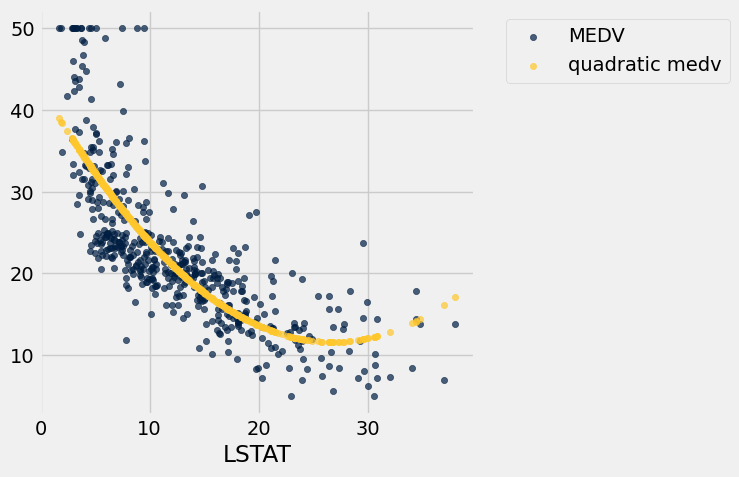

In [29]:
boston_with_quad_fit.scatter(0)

## Another Example

In [30]:
another_example = r_table(0.87)
another_example

x,y
0.0912047,-0.47395
1.09128,0.821967
-1.94697,-1.53889
-1.38635,-1.11615
-2.29649,-1.56386
2.40983,2.83242
1.72784,1.67913
2.20456,3.35373
0.794828,0.661334
0.976421,1.6


In [31]:
ae_slope = slope(another_example, 'x', 'y')
ae_intercept = intercept(another_example, 'x', 'y')

ae_slope, ae_intercept

(0.87128885869594375, 0.021642852798629684)

In [32]:
correlation(another_example, 'x', 'y')

0.8777453699533847

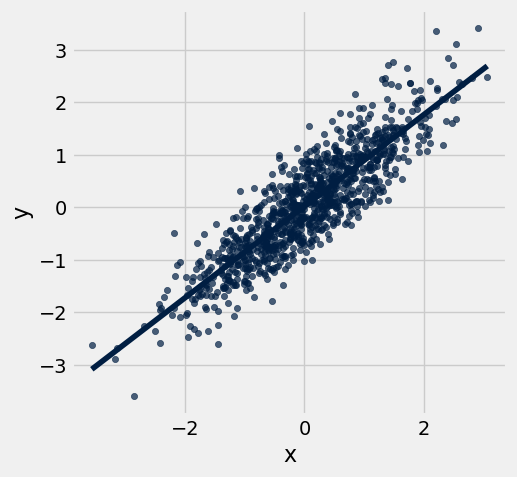

In [33]:
another_example.scatter('x', 'y', fit_line=True)

In [34]:
def another_example_rmse(any_slope, any_intercept):
    x = another_example.column('x')
    y = another_example.column('y')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate)**2)) ** 0.5

In [35]:
minimize(another_example_rmse)

array([ 0.87128885,  0.02164302])

In [36]:
ae_slope, ae_intercept

(0.87128885869594375, 0.021642852798629684)

In [37]:
another_example_with_resid = another_example.with_columns(
    'residual', residual(another_example, 'x', 'y'),
    'fit', fitted_values(another_example, 'x', 'y')
)

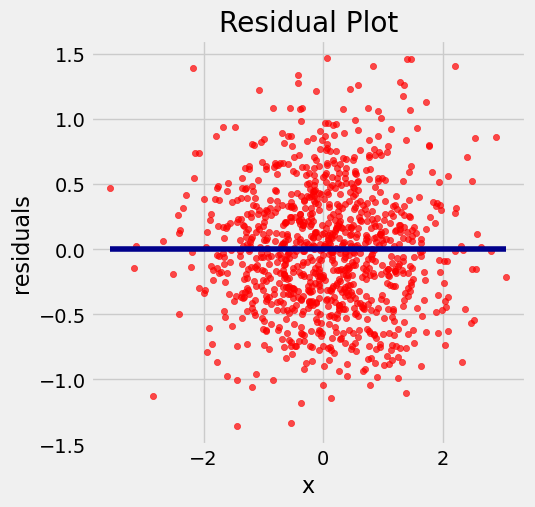

In [38]:
residual_plot(another_example, 'x', 'y')

In [39]:
correlation(another_example_with_resid,'x', 'residual')

2.0250467969162856e-16

In [40]:
correlation(another_example_with_resid,'fit', 'residual')

2.0605739337042906e-16

In [41]:
np.mean(another_example_with_resid.column('residual'))

7.9936057773011265e-18

### Residual Diagnostics: Residual Plots - Shotput

In [42]:
shotput = Table.read_table('shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


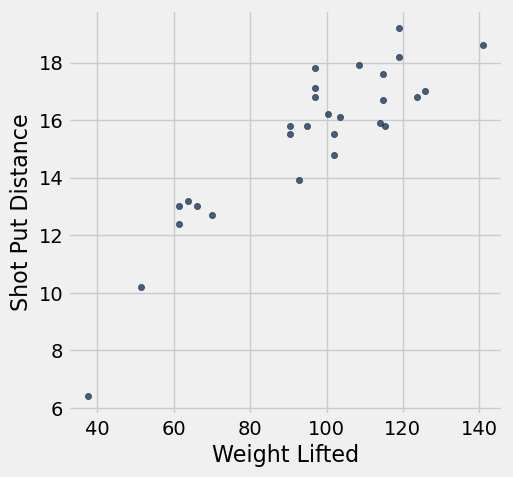

In [43]:
shotput.scatter('Weight Lifted')

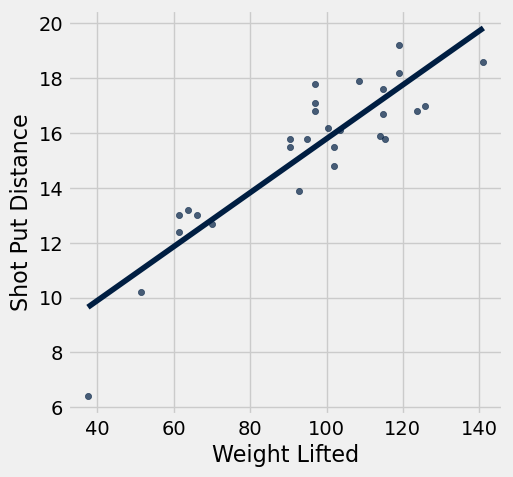

In [44]:
shotput.scatter('Weight Lifted', fit_line=True)

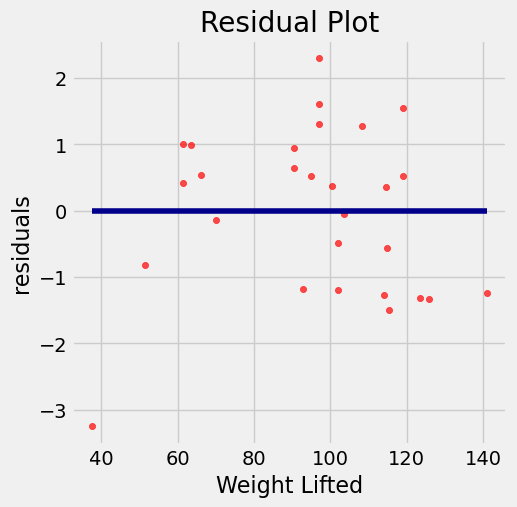

In [45]:
residual_plot(shotput, 'Weight Lifted', 'Shot Put Distance')

In [46]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [47]:
best_line = minimize(shotput_linear_rmse)
best_line

array([ 0.09834382,  5.95962883])

In [48]:
weights = shotput.column(0)

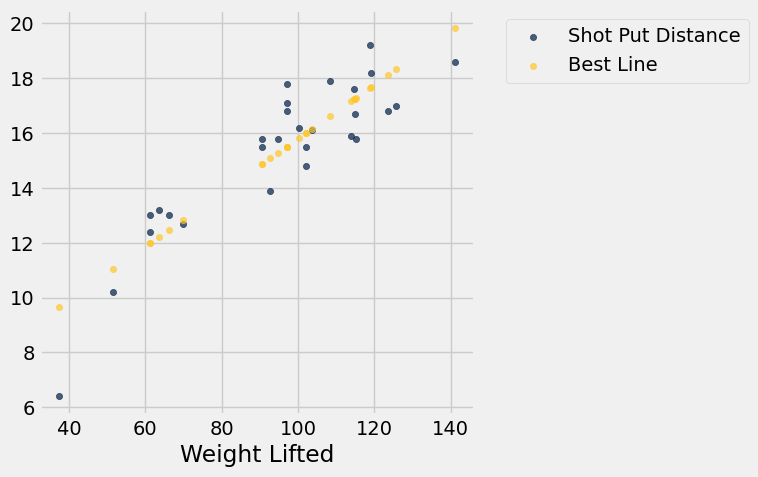

In [49]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

### Can we fix patterns in Residual Plots?

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [50]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [51]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([ -1.04003731e-03,   2.82706003e-01,  -1.53167618e+00])

In [52]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [53]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

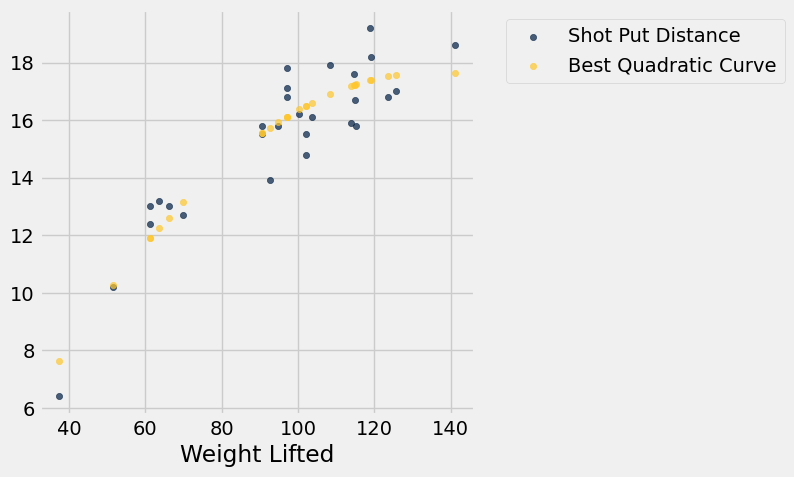

In [54]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

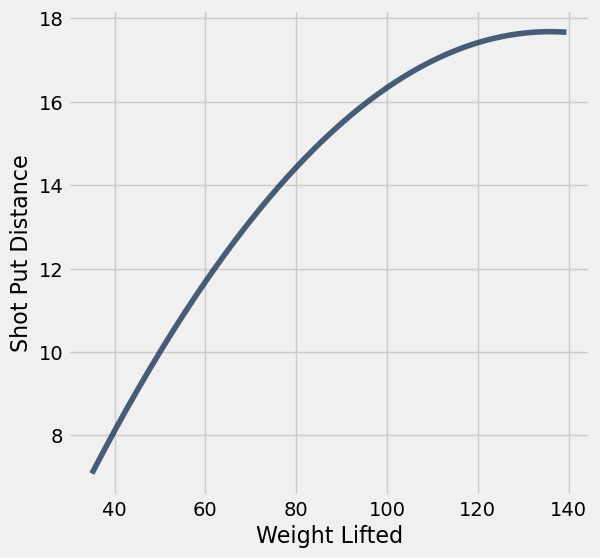

In [55]:
x = np.arange(35, 140, 0.5)
y = best_quad.item(0)*(x**2) + best_quad.item(1)*x + best_quad.item(2)

Table().with_columns('Weight Lifted', x, 'Shot Put Distance', y).plot('Weight Lifted')

### Residual Diagnostics: Heteroscedasticity (Uneven Spread)

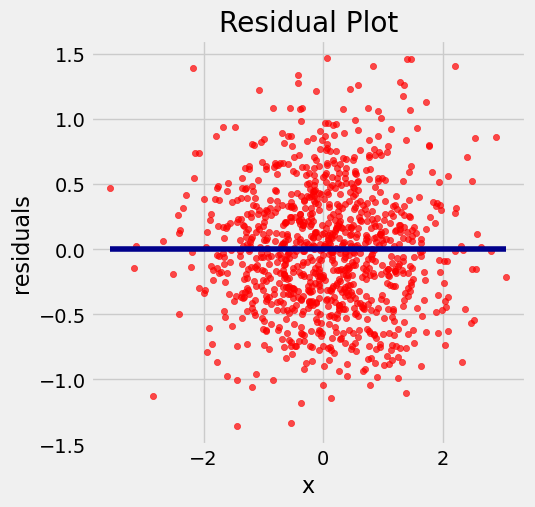

In [56]:
residual_plot(another_example, 'x', 'y')

In [57]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


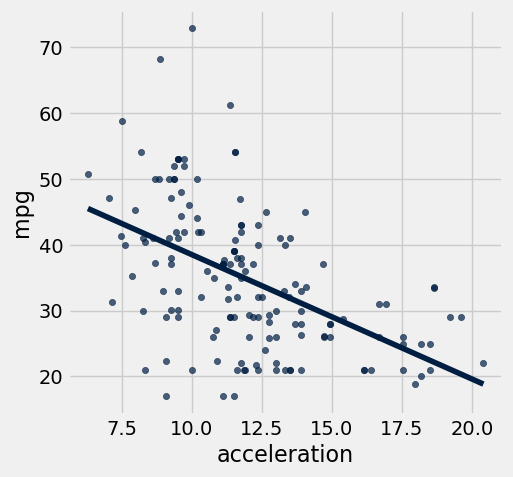

In [58]:
hybrid.scatter('acceleration', 'mpg', fit_line=True)

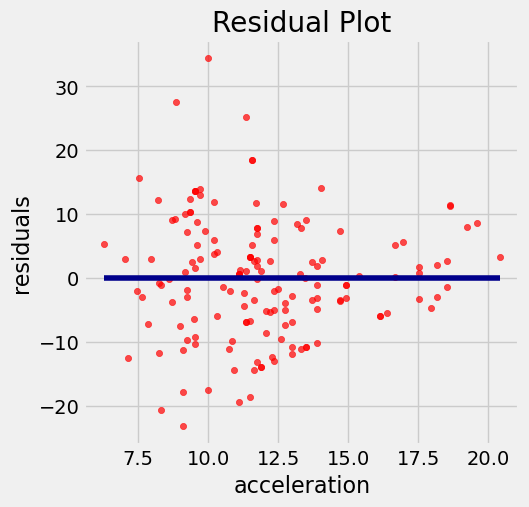

In [59]:
residual_plot(hybrid, 'acceleration', 'mpg')